# Smart TV Market Insights through Webscraping and Exploratory Data Analysis

#### You can use histograms, bar plots, scatter plots, box plots, pair plots, and heatmaps depending on the type of analysis and variable. Here's a breakdown by analysis type and variable category.

📊 Univariate Analysis
Numeric Variables:
- Histogram: Shows distribution of a single numeric variable.
- Box Plot: Highlights central tendency and outliers.
- Density Plot (KDE): Smooth version of histogram.
- Violin Plot: Combines box plot and KDE.
Categorical Variables:
- Bar Plot: Displays frequency of each category.
- Pie Chart: Shows proportion of categories.
- Count Plot: Similar to bar plot, often used in Seaborn.

📈 Bivariate Analysis
Numeric vs Numeric:
- Scatter Plot: Visualizes relationship between two numeric variables.
- Hexbin Plot: Density-based scatter plot for large datasets.
- Line Plot: Useful for time series or ordered data.
Categorical vs Numeric:
- Box Plot: Compares distributions across categories.
- Violin Plot: Adds density to box plot.
- Strip Plot: Shows individual data points.
- Swarm Plot: Like strip plot but avoids overlap.
Categorical vs Categorical:
- Grouped Bar Plot: Compares frequencies across categories.
- Stacked Bar Plot: Shows composition within categories.
- Heatmap (with crosstab): Visualizes frequency matrix.

📊 Multivariate Analysis
Mixed Variables:
- Pair Plot (Seaborn): Grid of scatter plots for all numeric combinations.
- Heatmap (Correlation Matrix): Shows correlation between numeric variables.
- Facet Grid: Multiple plots split by a categorical variable.
- 3D Scatter Plot: Visualizes three numeric variables.
- Bubble Chart: Adds a third variable via size.

🛠 Tools & Libraries
- Matplotlib: Basic plotting
- Seaborn: High-level interface for statistical plots
- Plotly: Interactive visualizations
- Pandas: Quick plotting via .plot()



# Flipkart Website

In [1]:
# libraries for web scraping
import requests
from bs4 import BeautifulSoup

# libraries for DataFrame creation
import pandas as pd
import numpy as np

# for regular expressions
import re

In [2]:
url="https://www.flipkart.com/search?q=smart+tv&sid=ckf%2Cczl&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_1_na_na_ps&otracker1=AS_QueryStore_OrganicAutoSuggest_1_1_na_na_ps&as-pos=1&as-type=RECENT&suggestionId=smart+tv%7CTelevisions&requestId=32dd2c96-5edf-4951-bad9-5688494c5955&as-searchtext=S&page=1"
page=requests.get(url)
page

<Response [200]>

In [3]:
soup=BeautifulSoup(page.text)

In [4]:
soup.find_all("div",class_="KzDlHZ")[4].text

'realme TechLife 139 cm (55 inch) QLED Ultra HD (4K) Smart Google TV 2025 Edition'

### Getting Brand

In [5]:
title=soup.find_all("div",class_="KzDlHZ")

In [6]:
Brand=[]
for i in title:
    Brand.append(i.text.split()[0])

In [7]:
print(Brand,len(Brand))

['realme', 'realme', 'Foxsky', 'Foxsky', 'realme', 'realme', 'Reliance', 'BESTON', 'Infinix', 'Samsung', 'Foxsky', 'Infinix', 'Infinix', 'LG', 'XIAOMI', 'Foxsky', 'MOTOROLA', 'Coocaa', 'MarQ', 'XIAOMI', 'TCL', 'XIAOMI', 'BESTON', 'Coocaa'] 24


### Getting Product Name

In [8]:
Product_Name=[]
for i in title:
    #print(re.sub(r"\s+\d+",'',i.text.split('cm')[0]))
    l=i.text.split('cm')[0].split()
    l.pop()
    Product_Name.append(" ".join(l))

In [9]:
print(Product_Name,len(Product_Name))

['realme TechLife', 'realme TechLife', 'Foxsky', 'Foxsky', 'realme TechLife', 'realme TechLife', 'Reliance Jumbo', 'BESTON', 'Infinix 32GH3Q', 'Samsung', 'Foxsky', 'Infinix', 'Infinix', 'LG LR570', 'XIAOMI by Mi A', 'Foxsky', 'MOTOROLA', 'Coocaa S4U Pro', 'MarQ by Flipkart', 'XIAOMI by Mi Fire Tv', 'TCL V5C', 'XIAOMI by Mi A Pro', 'BESTON', 'Coocaa Y74 Plus'] 24


### Getting Display Size

In [10]:
Display_inches=[]
for i in title:
    Display_inches.append(i.text.split('(')[1][0:3])

In [11]:
print(Display_inches,len(Display_inches))

['32 ', '43 ', '24 ', '32 ', '55 ', '75 ', '32 ', '32 ', '32 ', '32 ', '32 ', '43 ', '32 ', '32 ', '32 ', '43 ', '32 ', '32 ', '32 ', '32 ', '32 ', '32 ', '43 ', '55 '] 24


### Getting Display Type

In [12]:
text = soup.find_all('li', class_='J+igdf')

In [13]:
Display_Type=[]
for i in text:
    if ("HD" in i.text) and ("LED" in i.text or "QLED" in i.text):
        Display_Type.append(i.text.split('|')[1].strip())

In [14]:
print(Display_Type,len(Display_Type))

['QLED', 'QLED', 'LED', 'LED', 'QLED', 'QLED', 'LED', 'LED', 'QLED', 'LED', 'QLED', 'QLED', 'LED', 'LED', 'LED', 'LED', 'QLED', 'LED', 'LED', 'LED', 'QLED', 'QLED', 'LED', 'LED'] 24


### Model Number

In [15]:
Model_Id=[]
for i in text:
    if ("Model" in i.text):
        Model_Id.append(i.text.split(':')[1].strip())

In [16]:
print(Model_Id,len(Model_Id))

['32HDGQRDDAQ', '43UHDGQRVSAQ', '24 FSELS PRO', '32 FSELS PRO', '55UHDGQRDDVQ', '75UHDGQRWSTQ', 'RGT32MP2784FHD', 'BS32HD1', '32GH3Q', 'UA32T4380AKXXL', '32FS-GOOGLE LED TV', '43GU3Q', '32Y1D/32Y1C/32Y1B', '32LR570B6LA', 'L32MB-AIN', '43FS-VS//43FSFHS', '32HDGQMDDAQ', '32S4U Pro', '32HDCDQEE1B', 'L32MB-FIN', '32V5C', 'L32MB-APIN', 'BS43FHD', '55Y74 Plus'] 24


### getting Launch year

In [17]:
Launch_Year=[]
for i in text:
    if ("Launch Year" in i.text):
        Launch_Year.append(i.text.split(':')[1].strip())

In [18]:
print(Launch_Year,len(Launch_Year))

['2025', '2025', '2025', '2023', '2025', '2025', '2025', '2025', '2025', '2022', '2024', '2024', '2024', '2025', '2025', '2023', '2025', '2025', '2023', '2025', '2025', '2025', '2025', '2025'] 24


### Sound_Output_Watt

In [19]:
Sound_Output_Watt=[]
for i in text:
    if 'Sound Output' in i.text:
        Sound_Output_Watt.append(i.text.split(':')[1].strip().replace(' W',''))

In [20]:
print(Sound_Output_Watt,len(Sound_Output_Watt))

['26', '40', '30', '30', '40', '30', '24', '20', '20', '20', '30', '40', '16', '10', '20', '30', '40', '20', '24', '20', '24', '20', '20', '20'] 24


### Getting Warranty

In [21]:
Warranty=[]
for i in text:
    if 'Warranty' in i.text or 'warranty' in i.text:
        Warranty.append(i.text.split()[0].replace('-Year','').replace('12','1'))

In [22]:
print(Warranty,len(Warranty))

['1', '1', '1', '1', '1', '1', '1', '2', '1', '1', '1', '1', '1', 'Warranty', '1', '1', '1', '1', '1', '1', '1', 'Enjoy', '2', '1'] 24


### Getting Resolution

In [23]:
Resolution=[]
for i in text:
    if 'HD' in i.text and 'LED' in i.text:
        Resolution.append(i.text.split('|')[0].strip())

In [24]:
print(Resolution,len(Resolution))

['HD Ready', 'Ultra HD (4K)', 'HD Ready', 'HD Ready', 'Ultra HD (4K)', 'Ultra HD (4K)', 'Full HD', 'HD Ready', 'HD Ready', 'HD Ready', 'HD Ready', 'Ultra HD (4K)', 'HD Ready', 'HD Ready', 'HD Ready', 'Full HD', 'HD Ready', 'HD Ready', 'HD Ready', 'HD Ready', 'Full HD', 'HD Ready', 'Full HD', 'Ultra HD (4K)'] 24


### Getting Original_Price

In [25]:
Original_Price=[]
for i in soup.find_all('div',class_="yRaY8j ZYYwLA"):
    Original_Price.append(i.text)

In [26]:
print(Original_Price,len(Original_Price))

['₹23,999', '₹48,799', '₹9,990', '₹22,499', '₹65,399', '₹2,39,999', '₹19,990', '₹17,999', '₹16,999', '₹18,900', '₹26,499', '₹21,999', '₹16,999', '₹21,240', '₹24,999', '₹41,499', '₹26,999', '₹13,999', '₹21,000', '₹24,999', '₹22,990', '₹26,999', '₹23,999', '₹54,999'] 24


### Getting Discounted_Price

In [27]:
Discounted_Price=[]
for i in soup.find_all('div',class_="Nx9bqj _4b5DiR"):
    Discounted_Price.append(i.text)

In [28]:
print(Discounted_Price,len(Discounted_Price))

['₹9,999', '₹22,499', '₹5,499', '₹6,999', '₹28,499', '₹60,999', '₹7,499', '₹6,999', '₹8,499', '₹13,989', '₹8,499', '₹16,999', '₹7,999', '₹13,990', '₹13,999', '₹11,499', '₹10,490', '₹7,699', '₹7,499', '₹12,999', '₹12,490', '₹14,999', '₹11,999', '₹21,999'] 24


### Getting Ratings

In [29]:
rate=soup.find_all('div',class_="XQDdHH")

In [30]:
Ratings=[]
for i in rate:
    Ratings.append(i.text)

In [31]:
Ratings=Ratings[0:24]

In [32]:
dict={'Brand':Brand,
      'Product_Name':Product_Name,
      'Display_inches':Display_inches,
      'Display_Type':Display_Type,
      'Model_Id':Model_Id,
      'Launch_Year':Launch_Year,
      'Sound_Output_Watt':Sound_Output_Watt,
      'Warranty':Warranty,
      'Resolution':Resolution,
      'Original_Price':Original_Price,
      'Discounted_Price':Discounted_Price,
      'Ratings':Ratings}

In [33]:
page_1=pd.DataFrame(dict)

In [34]:
page_1.columns

Index(['Brand', 'Product_Name', 'Display_inches', 'Display_Type', 'Model_Id',
       'Launch_Year', 'Sound_Output_Watt', 'Warranty', 'Resolution',
       'Original_Price', 'Discounted_Price', 'Ratings'],
      dtype='object')

-----------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------

### Page 2 & 3

In [ ]:
Brand_23=[]
Product_Name_23=[]
Display_inches_23=[]
Display_Type_23=[]
Model_Id_23=[]
Launch_Year_23=[]
Sound_Output_Watt_23=[]
Warranty_23=[]
Resolution_23=[]
Original_Price_23=[]
Discounted_Price_23=[]
for i in range(2,4):
    url='https://www.flipkart.com/search?q=smart+tv&sid=ckf%2Cczl&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_1_na_na_ps&otracker1=AS_QueryStore_OrganicAutoSuggest_1_1_na_na_ps&as-pos=1&as-type=RECENT&suggestionId=smart+tv%7CTelevisions&requestId=32dd2c96-5edf-4951-bad9-5688494c5955&as-searchtext=S&page='+str(i)
    print(url)
    page=requests.get(url)
    soup=BeautifulSoup(page.text)
    #Title
    title=soup.find_all("div",class_="KzDlHZ")
    #Getting Brand
    for i in title:
        Brand_23.append(i.text.split()[0])
    print(Brand_23,len(Brand_23))
    
    #Getting Product Name
    for i in title:
        l=i.text.split('cm')[0].split()
        l.pop()
        Product_Name_23.append(" ".join(l))
    print(Product_Name_23,len(Product_Name_23))
    
    #Getting Display Size
    for i in title:
        Display_inches_23.append(i.text.split('(')[1][0:3])
    print(Display_inches_23,len(Display_inches_23))

    #Text
    text = soup.find_all('li', class_='J+igdf')

    #Getting Display Type
    for i in text:
        if ("HD" in i.text) and ("LED" in i.text or "QLED" in i.text):
            Display_Type_23.append(i.text.split('|')[1].strip())
    print(Display_Type_23,len(Display_Type_23))

    #Getting Model Id
    for i in text:
        if ("Model" in i.text):
            Model_Id_23.append(i.text.split(':')[1].strip())
    print(Model_Id_23,len(Model_Id_23))

    #Getting Lauch year
    for i in text:
        if ("Launch Year" in i.text):
            Launch_Year_23.append(i.text.split(':')[1].strip())
    print(Launch_Year_23,len(Launch_Year_23))

    #Getting Sound output
    for i in text:
        if 'Sound Output' in i.text:
            Sound_Output_Watt_23.append(i.text.split(':')[1].strip().replace(' W',''))
    print(Sound_Output_Watt_23,len(Sound_Output_Watt_23))

    #Getting Warranty
    for i in text:
        if 'Warranty' in i.text or 'warranty' in i.text:
            Warranty_23.append(i.text.split()[0].replace('-Year','').replace('12','1'))
    print(Warranty_23,len(Warranty_23))

    #Getting Resolution
    for i in text:
        if 'HD' in i.text and 'LED' in i.text:
            Resolution_23.append(i.text.split('|')[0].strip())
    print(Resolution_23,len(Resolution_23))

    #Getting Original Price
    for i in soup.find_all('div',class_="yRaY8j ZYYwLA"):
        Original_Price_23.append(i.text)
    print(Original_Price_23,len(Original_Price_23))

    #Getting Discounted Price
    for i in soup.find_all('div',class_="Nx9bqj _4b5DiR"):
        Discounted_Price_23.append(i.text)
    print(Discounted_Price_23,len(Discounted_Price_23))

In [ ]:
Ratings_2=[]
url='https://www.flipkart.com/search?q=smart+tv&sid=ckf%2Cczl&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_1_na_na_ps&otracker1=AS_QueryStore_OrganicAutoSuggest_1_1_na_na_ps&as-pos=1&as-type=RECENT&suggestionId=smart+tv%7CTelevisions&requestId=32dd2c96-5edf-4951-bad9-5688494c5955&as-searchtext=S&page=2'
page=requests.get(url)
soup=BeautifulSoup(page.text)
#rating text
rate=soup.find_all('div',class_="XQDdHH")

#Getting Ratings
for i in rate:
    Ratings_2.append(i.text)    
Ratings_2=Ratings_2[0:24]
print(Ratings_2,len(Ratings_2))

In [ ]:
Ratings_3=[]
url='https://www.flipkart.com/search?q=smart+tv&sid=ckf%2Cczl&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_1_na_na_ps&otracker1=AS_QueryStore_OrganicAutoSuggest_1_1_na_na_ps&as-pos=1&as-type=RECENT&suggestionId=smart+tv%7CTelevisions&requestId=32dd2c96-5edf-4951-bad9-5688494c5955&as-searchtext=S&page=3'
page=requests.get(url)
soup=BeautifulSoup(page.text)
#rating text
rate=soup.find_all('div',class_="XQDdHH")

#Getting Ratings
for i in rate:
    Ratings_3.append(i.text)    
Ratings_3=Ratings_3[0:24]
print(Ratings_3,len(Ratings_2))

In [ ]:
for i in Ratings_3:
    Ratings_2.append(i)

In [ ]:
Ratings_23=Ratings_2

In [ ]:
print(Ratings_23,len(Ratings_23))

In [ ]:
dict_23={'Brand':Brand_23,
      'Product_Name':Product_Name_23,
      'Display_inches':Display_inches_23,
      'Display_Type':Display_Type_23,
      'Model_Id':Model_Id_23,
      'Launch_Year':Launch_Year_23,
      'Sound_Output_Watt':Sound_Output_Watt_23,
      'Warranty':Warranty_23,
      'Resolution':Resolution_23,
      'Original_Price':Original_Price_23,
      'Discounted_Price':Discounted_Price_23,
      'Ratings':Ratings_23}

In [ ]:
page_23=pd.DataFrame(dict_23)
page_23.head()

In [ ]:
page_1_3=pd.concat([page_1,page_23],ignore_index=True)

In [ ]:
page_1_3

### Getting Pages 4-10

In [ ]:
Brand_4_10=[]
Product_Name_4_10=[]
Display_inches_4_10=[]
Display_Type_4_10=[]
Model_Id_4_10=[]
Launch_Year_4_10=[]
Sound_Output_Watt_4_10=[]
Warranty_4_10=[]
Resolution_4_10=[]
Original_Price_4_10=[]
Discounted_Price_4_10=[]
for i in range(4,11):
    url='https://www.flipkart.com/search?q=smart+tv&sid=ckf%2Cczl&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_1_na_na_ps&otracker1=AS_QueryStore_OrganicAutoSuggest_1_1_na_na_ps&as-pos=1&as-type=RECENT&suggestionId=smart+tv%7CTelevisions&requestId=32dd2c96-5edf-4951-bad9-5688494c5955&as-searchtext=S&page='+str(i)
    print(url)
    page=requests.get(url)
    soup=BeautifulSoup(page.text)
    #Title
    title=soup.find_all("div",class_="KzDlHZ")
    #Getting Brand
    for i in title:
        Brand_4_10.append(i.text.split()[0])
    print(Brand_4_10,len(Brand_4_10))
    print('----------------------------------------------------------------------------------------------------------------')
    #Getting Product Name
    for i in title:
        l=i.text.split('cm')[0].split()
        l.pop()
        Product_Name_4_10.append(" ".join(l))
    print(Product_Name_4_10,len(Product_Name_4_10))
    print('----------------------------------------------------------------------------------------------------------------')
    #Getting Display Size
    for i in title:
        Display_inches_4_10.append(i.text.split('(')[1][0:3])
    print(Display_inches_4_10,len(Display_inches_4_10))
    print('----------------------------------------------------------------------------------------------------------------')
    #Text
    text = soup.find_all('li', class_='J+igdf')

    #Getting Display Type
    for i in text:
        if ("HD" in i.text) and ("LED" in i.text or "QLED" in i.text):
            Display_Type_4_10.append(i.text.split('|')[1].strip())
    print(Display_Type_4_10,len(Display_Type_4_10))
    print('----------------------------------------------------------------------------------------------------------------')
    #Getting Model Id
    for i in text:
        if ("Model" in i.text):
            Model_Id_4_10.append(i.text.split(':')[1].strip())
    print(Model_Id_4_10,len(Model_Id_4_10))
    print('----------------------------------------------------------------------------------------------------------------')
    #Getting Lauch year
    for i in text:
        if ("Launch Year" in i.text):
            Launch_Year_4_10.append(i.text.split(':')[1].strip())
    print(Launch_Year_4_10,len(Launch_Year_4_10))
    print('----------------------------------------------------------------------------------------------------------------')
    #Getting Sound output
    for i in text:
        if 'Sound Output' in i.text:
            Sound_Output_Watt_4_10.append(i.text.split(':')[1].strip().replace(' W',''))
    print(Sound_Output_Watt_4_10,len(Sound_Output_Watt_4_10))
    print('----------------------------------------------------------------------------------------------------------------')
    #Getting Warranty
    for i in text:
        if 'Warranty' in i.text or 'warranty' in i.text:
            Warranty_4_10.append(i.text.split()[0].replace('-Year','').replace('12','1'))
    print(Warranty_4_10,len(Warranty_4_10))
    print('----------------------------------------------------------------------------------------------------------------')
    #Getting Resolution
    for i in text:
        if 'HD' in i.text and 'LED' in i.text:
            Resolution_4_10.append(i.text.split('|')[0].strip())
    print(Resolution_4_10,len(Resolution_4_10))
    print('----------------------------------------------------------------------------------------------------------------')
    #Getting Original Price
    for i in soup.find_all('div',class_="yRaY8j ZYYwLA"):
        Original_Price_4_10.append(i.text)
    print(Original_Price_4_10,len(Original_Price_4_10))
    print('----------------------------------------------------------------------------------------------------------------')
    #Getting Discounted Price
    for i in soup.find_all('div',class_="Nx9bqj _4b5DiR"):
        Discounted_Price_4_10.append(i.text)
    print(Discounted_Price_4_10,len(Discounted_Price_4_10))

### Getting Ratings for Pages(4-10)

In [233]:
Ratings_35=[]
url='https://www.flipkart.com/search?q=smart+tv&sid=ckf%2Cczl&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_1_na_na_ps&otracker1=AS_QueryStore_OrganicAutoSuggest_1_1_na_na_ps&as-pos=1&as-type=RECENT&suggestionId=smart+tv%7CTelevisions&requestId=32dd2c96-5edf-4951-bad9-5688494c5955&as-searchtext=S&page=35'
page=requests.get(url)
soup=BeautifulSoup(page.text)
#rating text
rate=soup.find_all('div',class_="XQDdHH")

#Getting Ratings
for i in rate:
    Ratings_35.append(i.text)    
Ratings_35=Ratings_35[0:24]
print(Ratings_35,len(Ratings_35))

['4.4', '3.9', '5', '4.8', '4.4', '5', '4.1', '4.2', '4.3', '4.1', '4.5', '4.4', '4.7', '4.1', '5', '5', '4.8', '4', '4', '4.4', '5', '1', '3.9', '3'] 24


In [234]:
for i in Ratings_35:
    Ratings_31.append(i)

In [235]:
print(len(Ratings_31))

120


In [236]:
Ratings_31_35=Ratings_31
Ratings_31_35

['3.9',
 '4.3',
 '4.3',
 '4.2',
 '5',
 '4.5',
 '5',
 '2.5',
 '3.8',
 '4.2',
 '4.2',
 '3.8',
 '4.7',
 '3.3',
 '4.3',
 '4.7',
 '5',
 '4.1',
 '4.2',
 '4',
 '5',
 '4.7',
 '5',
 '5',
 '4',
 '3.9',
 '4.2',
 '4.1',
 '4.2',
 '4.5',
 '3.6',
 '3.8',
 '3.7',
 '4.3',
 '3.7',
 '4.4',
 '4.4',
 '4.2',
 '4.2',
 '4.4',
 '4.4',
 '5',
 '5',
 '3.6',
 '5',
 '5',
 '4',
 '2',
 '4.1',
 '3.9',
 '4.1',
 '3.1',
 '4.1',
 '4.4',
 '4.4',
 '4.3',
 '4.8',
 '4',
 '4.2',
 '4.3',
 '4.2',
 '2.4',
 '3.1',
 '4',
 '4',
 '4.1',
 '4',
 '5',
 '4.4',
 '5',
 '3',
 '3.9',
 '4.2',
 '4.6',
 '4',
 '3.4',
 '3.8',
 '3.8',
 '3.8',
 '4.3',
 '3.9',
 '4.4',
 '4.2',
 '4.3',
 '5',
 '5',
 '3.9',
 '4',
 '4',
 '3.8',
 '5',
 '1',
 '3.8',
 '5',
 '2',
 '4.6',
 '4.4',
 '3.9',
 '5',
 '4.8',
 '4.4',
 '5',
 '4.1',
 '4.2',
 '4.3',
 '4.1',
 '4.5',
 '4.4',
 '4.7',
 '4.1',
 '5',
 '5',
 '4.8',
 '4',
 '4',
 '4.4',
 '5',
 '1',
 '3.9',
 '3']

In [ ]:
dict_4_10={'Brand':Brand_4_10,
      'Product_Name':Product_Name_4_10,
      'Display_inches':Display_inches_4_10,
      'Display_Type':Display_Type_4_10,
      'Model_Id':Model_Id_4_10,
      'Launch_Year':Launch_Year_4_10,
      'Sound_Output_Watt':Sound_Output_Watt_4_10,
      'Warranty':Warranty_4_10,
      'Resolution':Resolution_4_10,
      'Original_Price':Original_Price_4_10,
      'Discounted_Price':Discounted_Price_4_10,
      'Ratings':Ratings_4_10}

In [ ]:
page_4_10=pd.DataFrame(dict_4_10)

In [ ]:
smartTV_1=pd.concat([page_1_3,page_4_10],ignore_index=True)

In [ ]:
smartTV_1.to_csv(r"C:\Users\sirip\Documents\Innomatics\Batch_427A\EDA_Python\EDA_Project\smartTV_1.csv")

In [36]:
smartTV_1=pd.read_csv(r"C:\Users\sirip\Documents\Innomatics\Batch_427A\EDA_Python\EDA_Project\smartTV_1.csv")
smartTV_1

,Unnamed: 0,Brand,Product_Name,Display_inches,Display_Type,Model_Id,Launch_Year,Sound_Output_Watt,Warranty,Resolution,Original_Price,Discounted_Price,Ratings
0,0,Foxsky,Foxsky,32,LED,32 FSELS PRO,2023,30,1,HD Ready,"₹22,499","₹6,999",4.1
1,1,Thomson,Thomson Phoenix 2025 Edition,43,QLED,43QAI1005,2025,50,1,Ultra HD (4K),"₹28,999","₹18,889",4.3
2,2,Foxsky,Foxsky,32,QLED,32FS-GOOGLE LED TV,2024,30,1,HD Ready,"₹26,499","₹7,999",4.2
3,3,Foxsky,Foxsky,24,LED,24 FSELS PRO,2025,30,1,HD Ready,"₹9,990","₹5,499",4.1
4,4,Thomson,Thomson Phoenix 2025 Edition,55,QLED,55QAI1025,2025,60,1,Ultra HD (4K),"₹45,999","₹27,649",4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,235,TCL,TCL 65Q6CS,65,Mini LED,65Q6CS,2025,40,2,Ultra HD (4K),"₹1,59,990","₹62,551",3.9
236,236,SONY,SONY BRAVIA 3,65,LED,K-65S30,2024,20,3,Ultra HD (4K),"₹1,51,900","₹93,700",4.7
237,237,XIAOMI,XIAOMI by Mi A Series,43,LED,L43MA-AFIN,2024,20,1,Full HD,"₹35,999","₹20,280",4.0
238,238,Hisense,Hisense 50E75Q,50,QLED,50E75Q,2025,48,1,Ultra HD (4K),"₹53,999","₹28,999",4.2


In [38]:
smartTV_1.drop('Unnamed: 0',axis=1,inplace=True)

In [74]:
smartTV_2=pd.read_csv(r"C:\Users\sirip\Documents\Innomatics\Batch_427A\EDA_Python\EDA_Project\smartTV2.csv")
smartTV_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0.1       240 non-null    int64  
 1   Unnamed: 0         216 non-null    float64
 2   Brand              240 non-null    object 
 3   Product_Name       240 non-null    object 
 4   Display_inches     240 non-null    object 
 5   Display_Type       239 non-null    object 
 6   Model_Id           240 non-null    object 
 7   Launch_Year        240 non-null    int64  
 8   Sound_Output_Watt  240 non-null    int64  
 9   Warranty           236 non-null    object 
 10  Resolution         240 non-null    object 
 11  Original_Price     240 non-null    object 
 12  Discounted_Price   240 non-null    object 
 13  Ratings            240 non-null    float64
dtypes: float64(2), int64(3), object(9)
memory usage: 26.4+ KB


In [48]:
smartTV_2.drop(columns=['Unnamed: 0.1','Unnamed: 0'],inplace=True)

In [57]:
smartTV_semifinal=pd.concat([smartTV_1,smartTV_2],ignore_index=True)
smartTV_semifinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              480 non-null    object 
 1   Product_Name       480 non-null    object 
 2   Display_inches     480 non-null    object 
 3   Display_Type       479 non-null    object 
 4   Model_Id           480 non-null    object 
 5   Launch_Year        480 non-null    int64  
 6   Sound_Output_Watt  480 non-null    int64  
 7   Warranty           476 non-null    object 
 8   Resolution         480 non-null    object 
 9   Original_Price     480 non-null    object 
 10  Discounted_Price   480 non-null    object 
 11  Ratings            480 non-null    float64
dtypes: float64(1), int64(2), object(9)
memory usage: 45.1+ KB


In [ ]:
smartTV_semifinal['Warranty'].fillna(0,inplace=True)

In [80]:
smartTV_semifinal['Warranty'].isna().sum()

np.int64(0)

In [66]:
smartTV_3=pd.read_csv(r"C:\Users\sirip\Documents\Innomatics\Batch_427A\EDA_Python\EDA_Project\smarttv")
smartTV_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         206 non-null    int64 
 1   Brand              206 non-null    object
 2   Product_Name       206 non-null    object
 3   Display_inches     206 non-null    object
 4   Display_Type       206 non-null    object
 5   Model_Id           206 non-null    object
 6   Launch_Year        206 non-null    int64 
 7   Sound_Output_Watt  206 non-null    int64 
 8   Warranty           206 non-null    object
 9   Resolution         206 non-null    object
 10  Original_Price     206 non-null    object
 11  Discounted_Price   206 non-null    object
 12  Ratings            206 non-null    int64 
dtypes: int64(4), object(9)
memory usage: 21.1+ KB


In [67]:
smartTV_3.drop('Unnamed: 0',axis=1,inplace=True)

In [69]:
smartTV_Final=pd.concat([smartTV_semifinal,smartTV_3],ignore_index=True)

In [71]:
smartTV_Final.to_csv(r"C:\Users\sirip\Documents\Innomatics\Batch_427A\EDA_Python\EDA_Project\SmartTV_uncleaned.csv")

In [81]:
smartTV_Final

,Brand,Product_Name,Display_inches,Display_Type,Model_Id,Launch_Year,Sound_Output_Watt,Warranty,Resolution,Original_Price,Discounted_Price,Ratings
0,Foxsky,Foxsky,32,LED,32 FSELS PRO,2023,30,1,HD Ready,"₹22,499","₹6,999",4.1
1,Thomson,Thomson Phoenix 2025 Edition,43,QLED,43QAI1005,2025,50,1,Ultra HD (4K),"₹28,999","₹18,889",4.3
2,Foxsky,Foxsky,32,QLED,32FS-GOOGLE LED TV,2024,30,1,HD Ready,"₹26,499","₹7,999",4.2
3,Foxsky,Foxsky,24,LED,24 FSELS PRO,2025,30,1,HD Ready,"₹9,990","₹5,499",4.1
4,Thomson,Thomson Phoenix 2025 Edition,55,QLED,55QAI1025,2025,60,1,Ultra HD (4K),"₹45,999","₹27,649",4.3
...,...,...,...,...,...,...,...,...,...,...,...,...
681,Samsung,Samsung 6,65,QLED,QA65Q60AAKLXL,2021,20,1,Ultra HD (4K),"₹2,09,990","₹1,04,990",5.0
682,ONIDA,ONIDA,43,QLED,QZ43UI,2024,20,1,Ultra HD (4K),"₹42,390","₹27,002",3.0
683,SONY,SONY Bravia,75,LED,KD-75X80J,2021,20,1,Ultra HD (4K),"₹2,99,990","₹1,44,990",5.0
684,Samsung,Samsung,85,LED,UA85U8500FUXXL,2025,20,2,Ultra HD (4K),"₹3,39,000","₹2,19,989",3.0


# Pages 31 - 35

In [168]:
Brand_31_35=[]
Product_Name_31_35=[]
Display_inches_31_35=[]
Display_Type_31_35=[]
Model_Id_31_35=[]
Launch_Year_31_35=[]
Sound_Output_Watt_31_35=[]
Warranty_31_35=[]
Resolution_31_35=[]
Original_Price_31_35=[]
Discounted_Price_31_35=[]
for i in range(31,36):
    url='https://www.flipkart.com/search?q=smart+tv&sid=ckf%2Cczl&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_1_na_na_ps&otracker1=AS_QueryStore_OrganicAutoSuggest_1_1_na_na_ps&as-pos=1&as-type=RECENT&suggestionId=smart+tv%7CTelevisions&requestId=32dd2c96-5edf-4951-bad9-5688494c5955&as-searchtext=S&page='+str(i)
    print(url)
    page=requests.get(url)
    soup=BeautifulSoup(page.text)
    #Title
    title=soup.find_all("div",class_="KzDlHZ")
    #Getting Brand
    for i in title:
        Brand_31_35.append(i.text.split()[0])
    print(Brand_31_35,len(Brand_31_35))
    print('----------------------------------------------------------------------------------------------------------------')
    #Getting Product Name
    for i in title:
        l=i.text.split('cm')[0].split()
        l.pop()
        Product_Name_31_35.append(" ".join(l))
    print(Product_Name_31_35,len(Product_Name_31_35))
    print('----------------------------------------------------------------------------------------------------------------')
    #Getting Display Size
    for i in title:
        Display_inches_31_35.append(i.text.split('(')[1][0:3])
    print(Display_inches_31_35,len(Display_inches_31_35))
    print('----------------------------------------------------------------------------------------------------------------')
    #Text
    text = soup.find_all('li', class_='J+igdf')

    #Getting Display Type
    for i in text:
        if ("HD" in i.text) and ("LED" in i.text or "QLED" in i.text):
            Display_Type_31_35.append(i.text.split('|')[1].strip())
    print(Display_Type_31_35,len(Display_Type_31_35))
    print('----------------------------------------------------------------------------------------------------------------')
    #Getting Model Id
    for i in text:
        if ("Model" in i.text):
            Model_Id_31_35.append(i.text.split(':')[1].strip())
    print(Model_Id_31_35,len(Model_Id_31_35))
    print('----------------------------------------------------------------------------------------------------------------')
    #Getting Lauch year
    for i in text:
        if ("Launch Year" in i.text):
            Launch_Year_31_35.append(i.text.split(':')[1].strip())
    print(Launch_Year_31_35,len(Launch_Year_31_35))
    print('----------------------------------------------------------------------------------------------------------------')
    #Getting Sound output
    for i in text:
        if 'Sound Output' in i.text:
            Sound_Output_Watt_31_35.append(i.text.split(':')[1].strip().replace(' W',''))
    print(Sound_Output_Watt_31_35,len(Sound_Output_Watt_31_35))
    print('----------------------------------------------------------------------------------------------------------------')
    #Getting Warranty
    for i in text:
        if 'Warranty' in i.text or 'warranty' in i.text:
            Warranty_31_35.append(i.text.split()[0].replace('-Year','').replace('12','1'))
    print(Warranty_31_35,len(Warranty_31_35))
    print('----------------------------------------------------------------------------------------------------------------')
    #Getting Resolution
    for i in text:
        if 'HD' in i.text and 'LED' in i.text:
            Resolution_31_35.append(i.text.split('|')[0].strip())
    print(Resolution_31_35,len(Resolution_31_35))
    print('----------------------------------------------------------------------------------------------------------------')
    #Getting Original Price
    for i in soup.find_all('div',class_="yRaY8j ZYYwLA"):
        Original_Price_31_35.append(i.text)
    print(Original_Price_31_35,len(Original_Price_31_35))
    print('----------------------------------------------------------------------------------------------------------------')
    #Getting Discounted Price
    for i in soup.find_all('div',class_="Nx9bqj _4b5DiR"):
        Discounted_Price_31_35.append(i.text)
    print(Discounted_Price_31_35,len(Discounted_Price_31_35))

https://www.flipkart.com/search?q=smart+tv&sid=ckf%2Cczl&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_1_na_na_ps&otracker1=AS_QueryStore_OrganicAutoSuggest_1_1_na_na_ps&as-pos=1&as-type=RECENT&suggestionId=smart+tv%7CTelevisions&requestId=32dd2c96-5edf-4951-bad9-5688494c5955&as-searchtext=S&page=31
['acerpure', 'acerpure', 'LG', 'Aiwa', 'Haier', 'LG', 'Samsung', 'SONY', 'ONIDA', 'Elista', 'Haier', 'Samsung', 'Samsung', 'Aiwa', 'LG', 'LIMEBERRY', 'LG', 'LG', 'LG', 'LG', 'Samsung', 'Aiwa', 'Sansui', 'LG'] 24
----------------------------------------------------------------------------------------------------------------
['acerpure Nitro', 'acerpure Nitro', 'LG', 'Aiwa', 'Haier', 'LG', 'Samsung', 'SONY Bravia', 'ONIDA', 'Elista', 'Haier', 'Samsung The Frame', 'Samsung', 'Aiwa', 'LG Nanocell', 'LIMEBERRY Limeberry-TV', 'LG 65UA83506LA', 'LG Nanocell', 'LG Nanocell', 'LG Super UHD', 'Samsung 8', 'Aiwa', 'Sansui Prime Series', 'LG UQ8020'] 24
----------------------------------

Brand_31_35=[]
Product_Name_31_35=[]
Display_inches_31_35=[]
Display_Type_31_35=[]
Model_Id_31_35=[]
Launch_Year_31_35=[]
Sound_Output_Watt_31_35=[]
Warranty_31_35=[]
Resolution_31_35=[]
Original_Price_31_35=[]
Discounted_Price_31_35=[]

In [250]:
len(Display_Type_31_35)

120

In [249]:
Display_Type_31_35.extend(['LED','LED','LED'])

In [172]:
Warranty_31_35.extend(['1','1','2','1','1','1','1'])

In [176]:
Resolution_31_35.extend(['Ultra HD (4K)','HD Ready','HD Ready'])

In [215]:
Discounted_Price_31_35.insert(67,np.nan)

In [251]:
dict_31_35={'Brand':Brand_31_35,
      'Product_Name':Product_Name_31_35,
      'Display_inches':Display_inches_31_35,
      'Display_Type':Display_Type_31_35,
      'Model_Id':Model_Id_31_35,
      'Launch_Year':Launch_Year_31_35,
      'Sound_Output_Watt':Sound_Output_Watt_31_35,
      'Warranty':Warranty_31_35,
      'Resolution':Resolution_31_35,
      'Original_Price':Original_Price_31_35,
      'Discounted_Price':Discounted_Price_31_35,
      'Ratings':Ratings_31_35}

In [255]:
smartTV_3=pd.DataFrame(dict_31_35)
smartTV_3

,Brand,Product_Name,Display_inches,Display_Type,Model_Id,Launch_Year,Sound_Output_Watt,Warranty,Resolution,Original_Price,Discounted_Price,Ratings
0,acerpure,acerpure Nitro,43,QLED,AP43UG75PNTO5,2025,30,1,Ultra HD (4K),"₹50,990","₹19,999",3.9
1,acerpure,acerpure Nitro,65,QLED,AP65UG75PNTO5,2025,50,1,Ultra HD (4K),"₹1,10,990","₹36,999",4.3
2,LG,LG,65,LED,65UQ8040PSB,2022,20,1,Ultra HD (4K),"₹1,24,990","₹73,990",4.3
3,Aiwa,Aiwa,65,QLED,65AINSK165GTQX3H3BC,2024,24,1,Ultra HD (4K),"₹1,49,990","₹51,832",4.2
4,Haier,Haier,43,QLED,43Q5,2023,20,1,Ultra HD (4K),"₹56,990","₹35,000",5
...,...,...,...,...,...,...,...,...,...,...,...,...
115,LG,LG,50,LED,50UP7550PTZ.ATR,2021,20,2,Ultra HD (4K),"₹1,43,000","₹48,990",4.4
116,Acer,Acer XL Series,70,LED,AR70AR2851UD,2023,24,1,Full HD,"₹69,990","₹61,810",5
117,Panasonic,Panasonic,55,LED,TH-55MX750DX,2023,20,1,Ultra HD (4K),"₹78,990","₹50,860",1
118,Panasonic,Panasonic,65,LED,TH-65MX660DX,2023,20,1,HD Ready,"₹82,990","₹60,751",3.9


In [256]:
smartTV_Final=pd.concat([smartTV_Final,smartTV_3],ignore_index=True)

In [258]:
smartTV_Final.to_csv(r"C:\Users\sirip\Documents\Innomatics\Batch_427A\EDA_Python\EDA_Project\SmartTV_uncleaned.csv")

In [261]:
smartTV_cleaned=pd.read_csv(r"C:\Users\sirip\Documents\Innomatics\Batch_427A\EDA_Python\EDA_Project\SmartTV_cleaned.csv")

In [265]:
smartTV_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 0 to 615
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              616 non-null    object 
 1   Product_Name       616 non-null    object 
 2   Display_inches     616 non-null    int64  
 3   Display_Type       615 non-null    object 
 4   Model_Id           616 non-null    object 
 5   Launch_Year        616 non-null    object 
 6   Sound_Output_Watt  616 non-null    int64  
 7   Warranty           612 non-null    float64
 8   Resolution         616 non-null    object 
 9   Original_Price     616 non-null    int64  
 10  Discounted_Price   616 non-null    int64  
 11  Ratings            616 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 57.9+ KB


#### Further Data Cleaning

In [274]:
smartTV_cleaned['Discount_Percentage']=round((abs(smartTV_cleaned['Original_Price'] - smartTV_cleaned['Discounted_Price'])/smartTV_cleaned['Original_Price'])*100)

In [281]:
smartTV_cleaned

,Brand,Product_Name,Display_inches,Display_Type,Model_Id,Launch_Year,Sound_Output_Watt,Warranty,Resolution,Original_Price,Discounted_Price,Ratings,Discount_Percentage
0,Foxsky,Foxsky,32,LED,32 FSELS PRO,2023-01-01,30,1.0,HD Ready,22499,6999,4.1,69
1,Thomson,Thomson Phoenix 2025 Edition,43,QLED,43QAI1005,2025-01-01,50,1.0,Ultra HD (4K),28999,18889,4.3,35
2,Foxsky,Foxsky,32,QLED,32FS-GOOGLE LED TV,2024-01-01,30,1.0,HD Ready,26499,7999,4.2,70
3,Foxsky,Foxsky,24,LED,24 FSELS PRO,2025-01-01,30,1.0,HD Ready,9990,5499,4.1,45
4,Thomson,Thomson Phoenix 2025 Edition,55,QLED,55QAI1025,2025-01-01,60,1.0,Ultra HD (4K),45999,27649,4.3,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,SONY,SONY Bravia,75,LED,KD-75X80K,2022-01-01,20,1.0,Full HD,82900,144990,5.0,75
612,Sansui,Sansui,32,LED,(JSWY32GSHD),2023-01-01,20,1.0,Ultra HD (4K),269900,12490,5.0,95
613,Acer,Acer Advanced I Series,43,LED,AR43GR2841FDFL,2023-01-01,30,1.0,Ultra HD (4K),63400,27433,4.0,57
614,Acer,Acer XL Series,70,LED,AR70AR2851UD,2023-01-01,24,1.0,Full HD,69990,61810,5.0,12


In [279]:
smartTV_cleaned['Discount_Percentage']=smartTV_cleaned['Discount_Percentage'].astype('int64')

In [282]:
smartTV_cleaned.to_csv(r"C:\Users\sirip\Documents\Innomatics\Batch_427A\EDA_Python\EDA_Project\SmartTV_cleaned.csv")

In [6]:
smartTV_cleaned = pd.read_csv(r"C:\Users\sirip\Documents\Innomatics\Batch_427A\EDA_Python\EDA_Project\SmartTV_cleaned.csv")

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Univariate Analysis

## 1. How are TV prices distributed — do most TVs fall into budget, mid-range, or premium segments?

Now let’s look at the distribution of Smart TVs across different price segments.

In [322]:
#maximum price
max_price=smartTV_cleaned['Discounted_Price'].max()

#minimum price
min_price=smartTV_cleaned['Discounted_Price'].min()

bins=[min_price,50000,250000,1000000,max_price]
labels=['Budget (<50K)', 'Mid-Range (50K–2.5L)', 'Premium (2.5L–10L)', 'Luxury (>10L)']
price_category=pd.cut(smartTV_cleaned['Discounted_Price'],bins=bins,labels=labels,include_lowest=True).value_counts()
print("Distribution of Smart TVs Across Price Segments\n")
print(price_category.to_frame('Number of TVs'))

Distribution of Smart TVs Across Price Segments

                      Number of TVs
Discounted_Price                   
Budget (<50K)                   433
Mid-Range (50K–2.5L)            174
Premium (2.5L–10L)                8
Luxury (>10L)                     1


1. Majority of Smart TVs fall under the Budget Segment (<₹50K)

From the chart, we can see that most Smart TVs on Flipkart are priced below ₹50,000.
There are around 433 models in this range, which means a large share of the market is focused on budget buyers.
This makes sense because the Indian market is very price-sensitive — people look for TVs that offer good features at an affordable price.

2. Mid-Range (₹50K–₹2.5L) segment forms the second largest share

Next, we have the mid-range segment, priced between ₹50,000 and ₹2.5 lakhs, with around 174 models.
These TVs usually come with larger screens, 4K displays, and better sound quality.
They’re meant for customers who are willing to spend a bit more for a better viewing experience but still don’t want to go into the premium category.

3. Premium (₹2.5L–₹10L) TVs have very limited presence

Only 8 TVs fall in the Premium range.
These are mostly OLED or QLED models from top brands like Sony or Samsung.
These are aimed at customers who value brand and picture quality over price.

4. Luxury Segment (>₹10L) is almost non-existent

There’s only one TV above ₹10 lakhs.
This shows that ultra-premium TVs are rare on Flipkart and are mostly sold offline.

Overall, about 98% of Smart TVs are in the Budget and Mid-Range categories.
This clearly shows that the Indian market is mainly driven by affordability.

## 2. Which display type (LED, QLED, OLED) is most prevalent?

In [560]:
len(smartTV_cleaned['Brand'].unique())

60

In [324]:
smartTV_cleaned['Display_Type'].value_counts()

Display_Type
LED         349
QLED        214
Mini LED     31
OLED         18
QNED          2
Neo QLED      1
Name: count, dtype: int64

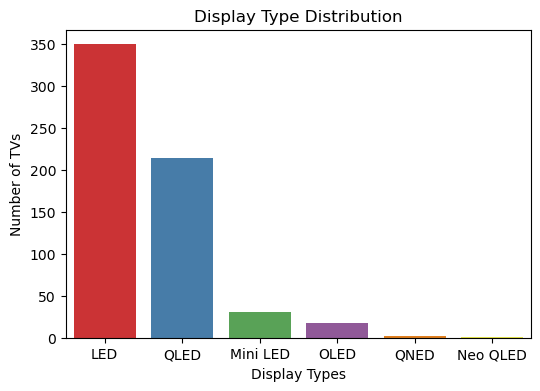

In [357]:
display_counts=smartTV_cleaned['Display_Type'].value_counts()
plt.figure(figsize=[6,4])
sns.countplot(data=smartTV_cleaned,x='Display_Type',palette='Set1')
plt.title("Display Type Distribution")
plt.xlabel('Display Types')
plt.ylabel('Number of TVs')
plt.show()

1. LED TVs dominate the market with the highest number of models.

From the bar chart, we can see that LED TVs dominate the market, with the highest count — around 350 models.
This shows that LED remains the most common and affordable display technology preferred by both customers and brands.

2. QLED TVs form the second-largest share, mainly in mid to high price range.

These are often seen in mid-range and premium categories, offering better color quality and brightness than standard LEDs.

3. Mini LED and OLED TVs are limited but growing gradually.

These are newer technologies with better contrast and visual quality but come at higher prices, which limits their availability.

4. QNED and Neo QLED TVs have very few models — represent latest premium tech.

QNED and Neo QLED are barely visible, with very few models listed.
These represent the latest, high-end display technologies — usually featured in premium models from brands like LG and Samsung.

Overall, this chart clearly shows that the Indian Smart TV market is still dominated by LED and QLED displays, while advanced types like OLED and QNED are slowly emerging but are still less common.

## 3. What is the overall customer satisfaction level based on ratings?

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))

# Histogram of Ratings
sns.histplot(smartTV_cleaned['Ratings'], bins=10, kde=True, color='skyblue')

# Customize plot
plt.title('Distribution of Customer Ratings for Smart TVs')
plt.xlabel('Customer Rating')
plt.ylabel('Number of TVs')
plt.tight_layout()
plt.show()

Insight: Customer satisfaction for smart TVs in this dataset is generally very high.

The distribution of ratings is heavily left-skewed, meaning most TVs receive high scores.

The most frequent rating (the highest peak on the histogram) is around 4.0 to 4.2.

There are also significant clusters of TVs rated around 4.5 and 5.0, indicating a large number of products are meeting or exceeding customer expectations. Very few TVs received ratings below 3.5.

## 4. What is the distribution of Ratings across all smart TVs — and how many TVs are rated above 4.5?

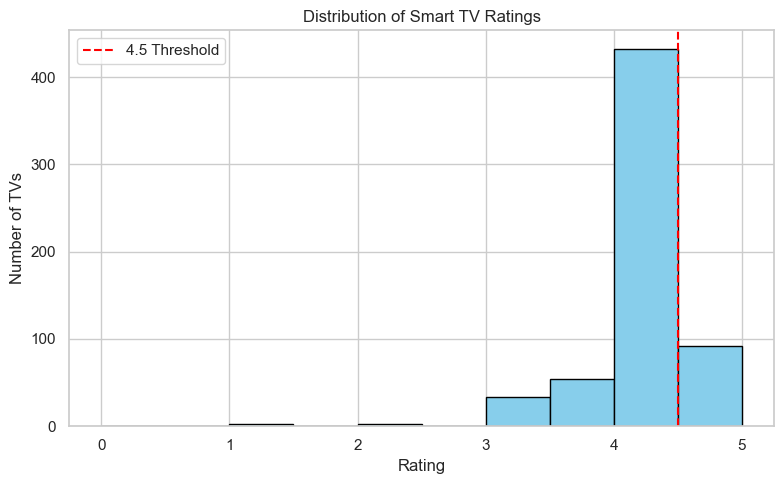

In [9]:
plt.figure(figsize=(8, 5))
plt.hist(smartTV_cleaned['Ratings'], bins=10, range=(0, 5), color='skyblue', edgecolor='black')
plt.title('Distribution of Smart TV Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of TVs')

# Count TVs rated above 4.5
high_rating_count = (smartTV_cleaned['Ratings'] > 4.5).sum()
plt.axvline(4.5, color='red', linestyle='--', label='4.5 Threshold')
plt.legend()
plt.tight_layout()
plt.show()

Insight: The histogram confirms the high customer satisfaction, with the vast majority of ratings falling between 3.8 and 5.0.

The red dashed line at the 4.5 mark visually isolates the top-performing TVs.

Based on the height of the rightmost bar (which represents ratings from 4.6 to 5.0), there are approximately 70 %TVs in the dataset that are rated above 4.5.

#### Further Data cleaning

In [384]:
smartTV_cleaned['Launch_Year']=pd.to_datetime(smartTV_cleaned['Launch_Year']).dt.year

In [389]:
smartTV_cleaned.to_csv(r"C:\Users\sirip\Documents\Innomatics\Batch_427A\EDA_Python\EDA_Project\SmartTV_cleaned.csv",index=False)

## 5. How many TVs were launched in the last 2 years — is the catalog skewed toward newer models?

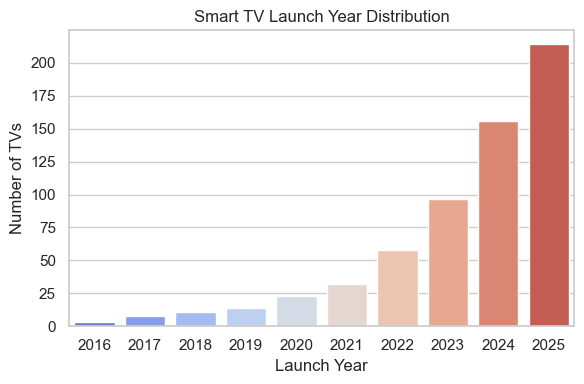

In [17]:
plt.figure(figsize=(6, 4))
sns.countplot(data=smartTV_cleaned, x='Launch_Year', palette='coolwarm')
plt.title('Smart TV Launch Year Distribution')
plt.xlabel('Launch Year')
plt.ylabel('Number of TVs')
plt.tight_layout()
plt.show()

##### Key Insights:
Manufacturers are increasingly releasing new smart TV models each year.  
The current latest technologies and models launched in the most recent years
showing that the market is actively refreshed and focused on modern offerings.

## 6. What sound output levels are most commonly offered — do most TVs cluster around 20W or higher?

Summary Statistics for Sound Output (Watts):
count    616.000000
mean      29.715909
std       14.889473
min       10.000000
25%       20.000000
50%       24.000000
75%       35.000000
max      124.000000
Name: Sound_Output_Watt, dtype: float64

Most Common Sound Output Levels:
Sound_Output_Watt
10       4
14       2
16      14
18       2
19       1
20     248
24      89
26       1
30      86
32       3
34       2
35      14
36      13
40      54
44       1
48      14
49       7
50      13
60      33
61       3
70       5
80       1
88       1
108      2
120      1
124      2
Name: count, dtype: int64

Percentage of TVs with 20W or higher sound output: 96.27%


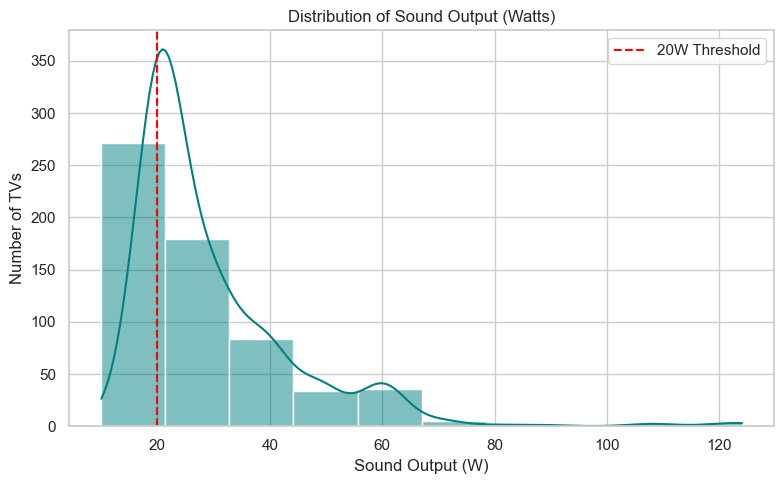

In [19]:
# Summary statistics
print("Summary Statistics for Sound Output (Watts):")
print(smartTV_cleaned['Sound_Output_Watt'].describe())

# Most common sound output levels
print("\nMost Common Sound Output Levels:")
print(smartTV_cleaned['Sound_Output_Watt'].value_counts().sort_index())

# Percentage of TVs with ≥ 20W sound output
above_20w_ratio = (smartTV_cleaned['Sound_Output_Watt'] >= 20).mean() * 100
print(f"\nPercentage of TVs with 20W or higher sound output: {above_20w_ratio:.2f}%")
plt.figure(figsize=(8,5))
sns.histplot(smartTV_cleaned['Sound_Output_Watt'], bins=10, kde=True, color='teal')
plt.axvline(20, color='red', linestyle='--', label='20W Threshold')
plt.title("Distribution of Sound Output (Watts)")
plt.xlabel("Sound Output (W)")
plt.ylabel("Number of TVs")
plt.legend()
plt.tight_layout()
plt.show()

Most TVs have a sound output around 20W, making it the most common level. 
Only a few models go higher, so the majority are designed with standard 20W speakers.

## Bivariate Analysis

## 1. Do recently launched models have higher prices compared to older ones?

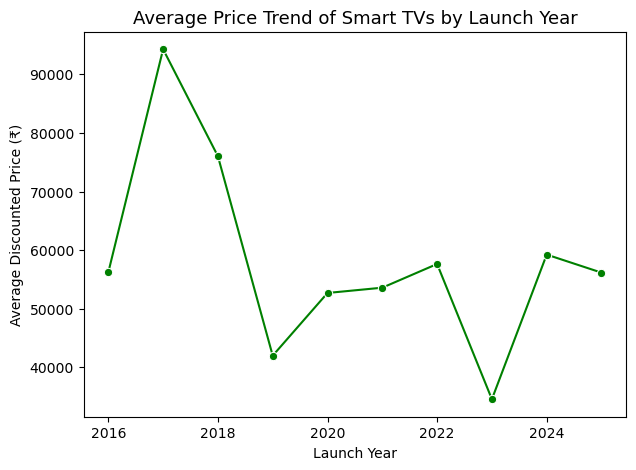

In [565]:
avg_price_by_year = smartTV_cleaned.groupby('Launch_Year')['Discounted_Price'].mean().round(2).sort_index()

plt.figure(figsize=(7,5))

sns.lineplot(x=avg_price_by_year.index,y=avg_price_by_year.values,marker='o',color='green')

plt.title('Average Price Trend of Smart TVs by Launch Year', fontsize=13)
plt.xlabel('Launch Year')
plt.ylabel('Average Discounted Price (₹)')
plt.show()

1. Smart TVs were most expensive around 2017–2018

During 2017 and 2018, the average price of Smart TVs was quite high. This may be because there were fewer brands at that time, and most available models were premium ones. Customers might have had limited choices, so the overall prices stayed high.

2. Noticeable drop in prices after 2018

After 2018, we can see a major fall in average prices. This might be due to the entry of more brands and affordable models in the market. Companies could have started focusing on budget-friendly TVs to attract more customers, especially in a price-sensitive market like India.

3. Prices stayed stable between 2020 and 2021

From 2020 to 2021, the prices look almost the same. This may be because brands kept similar pricing while improving the features. Customers might have got good TVs at the same price range during this time.

4. Slight price increase in 2024 models

In 2024, there’s a small increase in the average price. This may be because newer technologies like OLED and QLED displays, or AI-based features, are becoming more common. Brands might also be positioning these models slightly higher to highlight their advanced specifications.

Overall, the trend suggests that newer models are not always more expensive. Prices may depend more on the brand, display type, and features rather than the launch year. The Smart TV market seems to be moving toward offering modern technology at more affordable prices.

## 2. How has the display quality of Smart TVs improved over the years?

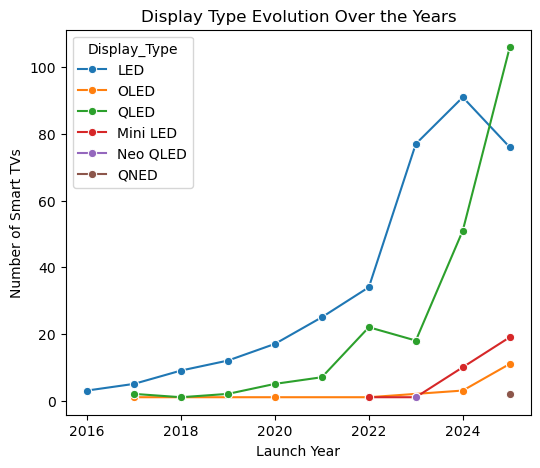

In [482]:
display_trend = (smartTV_cleaned.groupby(['Launch_Year', 'Display_Type']).size().reset_index(name='Count'))
plt.figure(figsize=(6,5))
sns.lineplot(data=display_trend, x='Launch_Year', y='Count', hue='Display_Type', marker='o',palette='tab10')
plt.title('Display Type Evolution Over the Years')
plt.xlabel('Launch Year')
plt.ylabel('Number of Smart TVs')
plt.show()

1. LED TVs are dominant across all years

LED models have stayed the most common type from 2016 till now.

They are affordable and widely accepted, so most brands still focus on them.

2. QLED TVs grew strongly after 2022

From 2022 onwards, QLED TVs started increasing quickly.

This may be because customers now prefer better picture quality at a slightly higher price.

3. OLED and Mini LED are slowly rising

We can see OLED and Mini LED TVs appearing more after 2023.

They might still be fewer, but their presence shows brands are moving toward advanced technologies.

4. New display types like Neo QLED and QNED just started

These types have appeared only in the last one or two years.

They are very few, which means they’re still new in the Indian market.

Earlier, there were mostly LED TVs, but now we see more variety.

This suggests that Smart TV technology is clearly improving and customers are getting more options.

## 3. How does price vary across screen sizes within each brand?

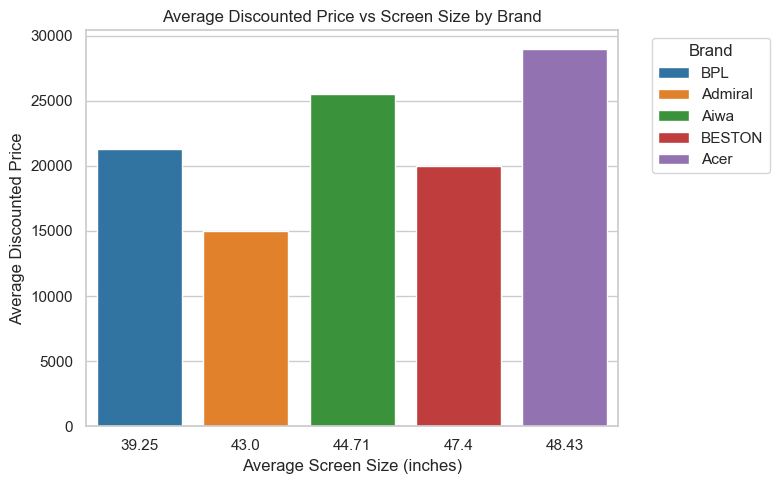

In [10]:
top_brands = smartTV_cleaned.groupby("Brand")[["Discounted_Price", "Display_inches"]].mean().round(2).head()
top_brands = top_brands.reset_index()

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(data=top_brands, x='Display_inches', y='Discounted_Price', hue='Brand', palette='tab10')

plt.title('Average Discounted Price vs Screen Size by Brand')
plt.xlabel('Average Screen Size (inches)')
plt.ylabel('Average Discounted Price')
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Insight: This analysis compared the average price and average screen size for the first five brands (alphabetically: Candes, Coocaa, Croma, Dyanora, Huidi).

For this subset of brands, there is a clear positive correlation:

Candes and Huidi have the smallest average screen sizes (around 32 inches) and the lowest average discounted prices (under ₹10,000).

Croma and Dyanora have the largest average screen sizes in this group (around 42-43 inches) and correspondingly have the highest average prices (over ₹15,000).

## 4. Do TVs with longer warranties receive better ratings?

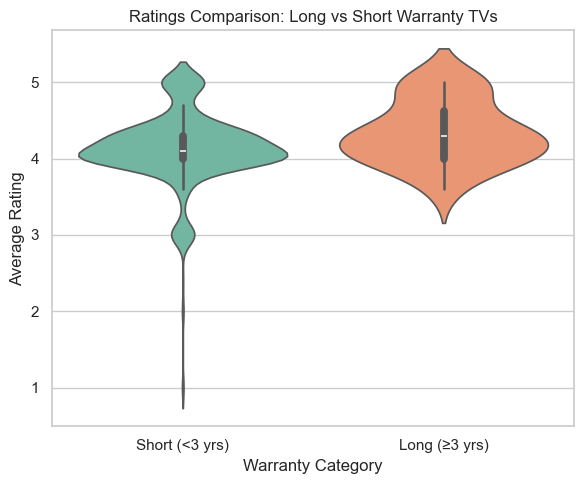

In [11]:
smartTV_cleaned['Warranty_Category'] = smartTV_cleaned['Warranty'].apply(lambda x: 'Long (≥3 yrs)' if x >= 3 else 'Short (<3 yrs)')

# Plot average ratings by warranty category
plt.figure(figsize=(6, 5))
sns.violinplot(data=smartTV_cleaned, x='Warranty_Category', y='Ratings', palette='Set2')
plt.title('Ratings Comparison: Long vs Short Warranty TVs')
plt.xlabel('Warranty Category')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()

Insight: Yes, the data strongly suggests a link between warranty length and customer satisfaction.

Short Warranty TVs (<3 years): These show a very wide spread of ratings, from 3.0 all the way to 5.0. The most common rating is centered around 4.2.

Long Warranty TVs (≥3 years): These have a much higher median rating (around 4.5) and a significantly tighter, more consistent distribution. This indicates that products offering longer warranties are not only rated better on average but are also more reliably high-performers.

## 5. Do deeper discounts correlate with higher or lower customer satisfaction?

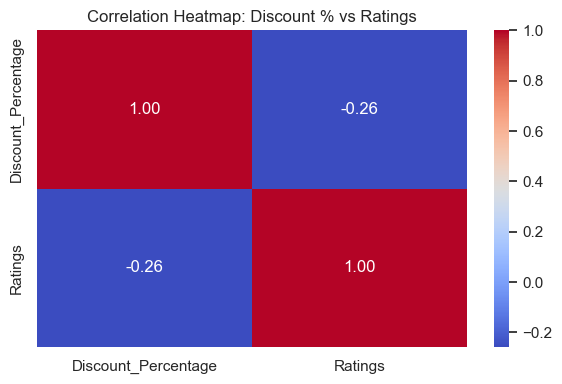

In [20]:
corr_matrix = smartTV_cleaned[['Discount_Percentage', 'Ratings']].corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Heatmap: Discount % vs Ratings')
plt.tight_layout()
plt.show()

The heatmap shows a negative correlation (-0.26) between discount percentage and ratings.
customer ratings tend to drop a little products with higher discounts may not satisfy customers

## 6. Do larger TVs consistently offer higher sound output?

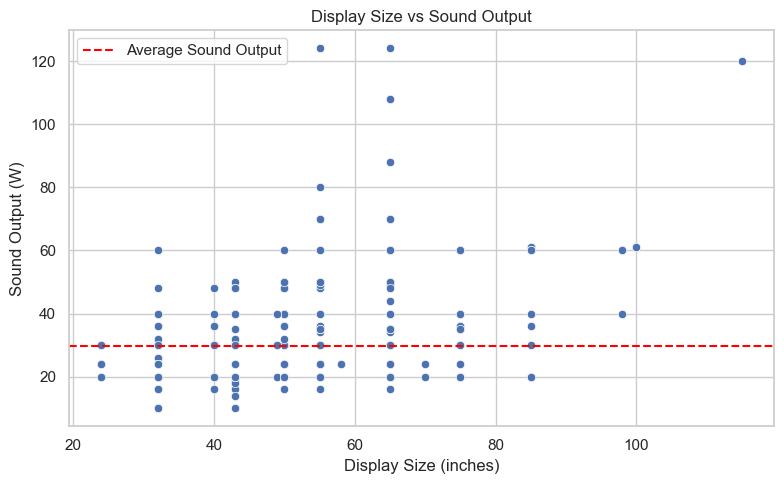

In [21]:
corr_display_sound = smartTV_cleaned['Display_inches'].corr(smartTV_cleaned['Sound_Output_Watt'])
plt.figure(figsize=(8,5))
sns.scatterplot(x='Display_inches', y='Sound_Output_Watt', data=smartTV_cleaned)
plt.title('Display Size vs Sound Output')
plt.xlabel('Display Size (inches)')
plt.ylabel('Sound Output (W)')
plt.axhline(smartTV_cleaned['Sound_Output_Watt'].mean(), color='red', linestyle='--', label='Average Sound Output')
plt.legend()
plt.tight_layout()
plt.show()

A clear positive correlation shows that larger TVs (≥ 55 inches) consistently feature higher-than-average sound output.

### Multivariate Analysis

## 1. Impact of Display Type and Resolution on Price Across Top Brands

In [536]:
avg_price = (smartTV_cleaned.groupby(['Brand', 'Display_Type', 'Resolution'])['Discounted_Price'].mean().round(2).reset_index())

In [538]:
top_brands=smartTV_cleaned['Brand'].value_counts().head(10).index
top_10_brands

Index(['Samsung', 'LG', 'TCL', 'Hisense', 'SONY', 'XIAOMI', 'TOSHIBA', 'Acer',
       'Sansui', 'Thomson'],
      dtype='object', name='Brand')

In [549]:
avg_price = avg_price[avg_price['Brand'].isin(top_brands)]

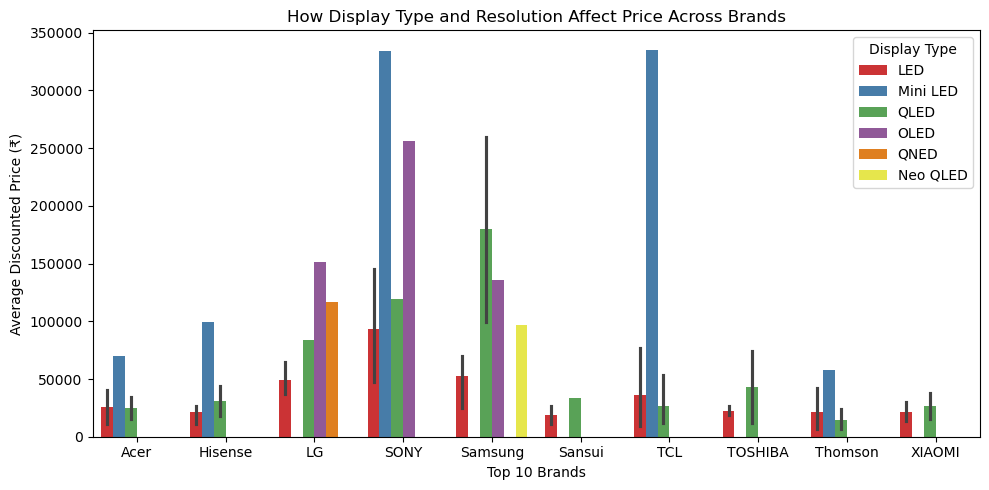

In [550]:
plt.figure(figsize=(10,5))
sns.barplot(data=avg_price,x='Brand',y='Discounted_Price',hue='Display_Type',palette='Set1')

plt.title('How Display Type and Resolution Affect Price Across Brands')
plt.xlabel('Top 10 Brands')
plt.ylabel('Average Discounted Price (₹)')
plt.legend(title='Display Type', loc='upper right')
plt.tight_layout()
plt.show()

1. Mini LED and OLED TVs are the most expensive.

If we see here, the Mini LED and OLED bars are the tallest for almost every brand. These are premium display types, so they naturally come with higher prices because of better brightness and picture quality.

2. Sony and TCL have the highest-priced models overall.

Sony and TCL clearly stand out — both brands show very high prices, mainly because they focus more on advanced displays like Mini LED and OLED.

3. LG and Samsung offer both budget and premium options.
   
LG and Samsung have a mix of all display types — LED, QLED, and OLED. So, their prices vary from low to high, depending on the display type.

4. Budget brands mostly stick to LED or QLED.

If we look at Acer, Hisense, Sansui, and Thomson — their bars are mostly LED and QLED, which keeps their average price lower compared to brands like Sony and LG.

5. QLED TVs are mid-range across brands.

QLED models fall in the middle range — they cost more than LED but less than OLED or Mini LED, so they attract mid-budget customers.

6. Display type plays a major role in pricing.

Overall, we can see that as display type improves from LED to QLED to OLED or Mini LED, the price also increases. So, display type is one of the biggest factors affecting smart TV prices.

## 2. Which combination of brand, launch year, and rating reveals consistent customer satisfaction over time?

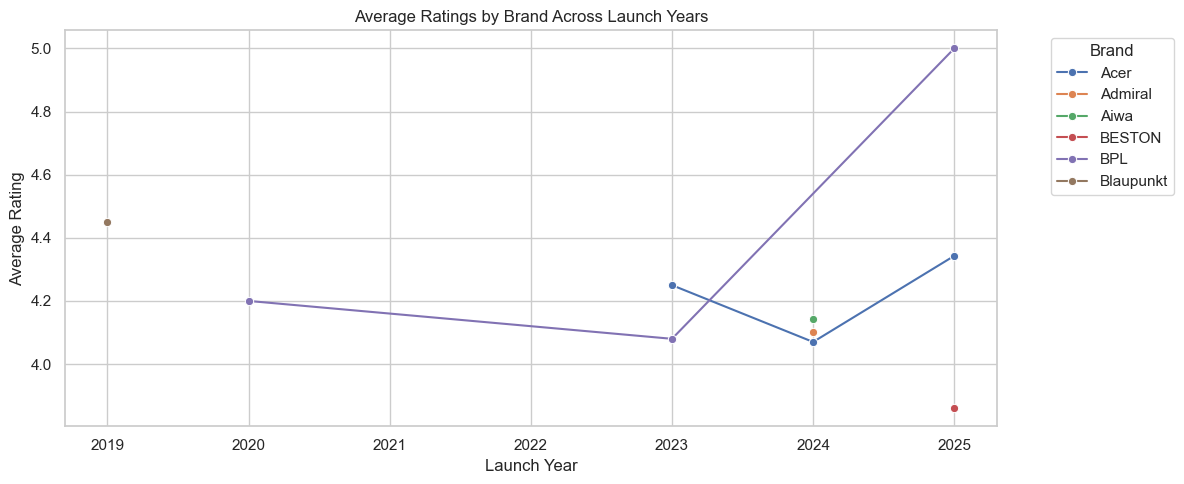

In [13]:
brand_year_rating = smartTV_cleaned.groupby(['Brand', 'Launch_Year'])['Ratings'].mean().head(10).reset_index()

# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 5))

# Lineplot for each brand
sns.lineplot(data=brand_year_rating, x='Launch_Year', y='Ratings', hue='Brand', marker='o')

plt.title('Average Ratings by Brand Across Launch Years')
plt.xlabel('Launch Year')
plt.ylabel('Average Rating')
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Insight: This analysis, which was limited to the first 10 brand-year combinations in the data (primarily Adsun, BPL, and Blaupunkt), shows:

BPL demonstrated strong, consistent satisfaction, with its average rating holding steady around 4.2-4.3 between 2018 and 2021.

Blaupunkt also showed high consistency in its 2021 and 2022 models, with ratings around 4.3-4.4.

Adsun experienced a slight decline in average ratings from 2019 to 2021.

## 3. Which brands offer large-screen TVs with deep discounts and high customer satisfaction?

      Brand  Count
4       TCL      9
3   Samsung      5
1        LG      5
2      SONY      3
0      Acer      1
5  acerpure      1
6    realme      1


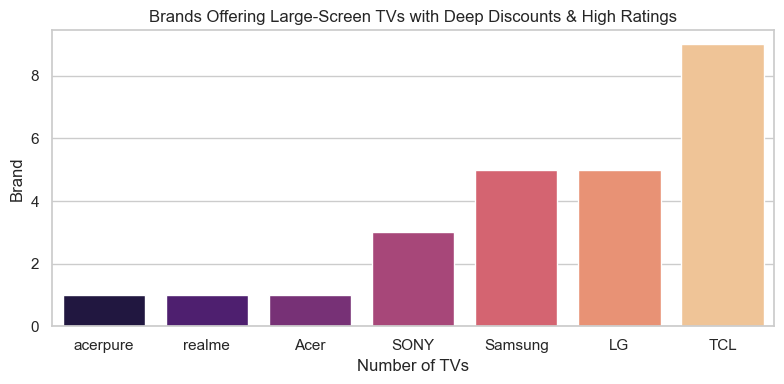

In [25]:
# Thresholds (adjust if needed)
large_screen_threshold = 55  # TVs ≥ 55 inches
deep_discount_threshold = smartTV_cleaned['Discount_Percentage'].quantile(0.75)  # top 25% discounts
high_rating_threshold = smartTV_cleaned['Ratings'].quantile(0.75)  # top 25% ratings

# Filter TVs meeting all 3 criteria
filtered_tvs = smartTV_cleaned[
    (smartTV_cleaned['Display_inches'] >= large_screen_threshold) &
    (smartTV_cleaned['Discount_Percentage'] >= deep_discount_threshold) &
    (smartTV_cleaned['Ratings'] >= high_rating_threshold)
]

# Group by Brand to see which brands have the most TVs meeting criteria
brand_summary = filtered_tvs.groupby('Brand').size().reset_index(name='Count')
brand_summary = brand_summary.sort_values(by='Count', ascending=False)
print(brand_summary)
plt.figure(figsize=(8,4))
sns.barplot(y='Count', x='Brand', data=brand_summary.sort_values('Count', ascending=True), palette='magma',)
plt.title('Brands Offering Large-Screen TVs with Deep Discounts & High Ratings')
plt.xlabel('Number of TVs')
plt.ylabel('Brand')
plt.tight_layout()
plt.show()

TCL leads the market with the most large-screen TVs offering both deep discounts and high customer satisfaction
Samsung and LG follow closely, showing strong brand trust and value for money.